In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./anonymous-survey-responses.csv')
data.shape

(1249, 4)

In [3]:
data.head()

,Have you ever taken a course in statistics?,Do you have any previous experience with programming?,What's your interest in data science?,"Just for fun, do you prefer dogs or cat?"
0,Yep,Nope,I want to get a job where I use data science,Cats ?±
1,Yep,I have quite a bit of experience,I want to get a job where I use data science,Dogs ?¶
2,Yep,I have a little bit of experience,It will help me in my current job,Dogs ?¶
3,Nope,I have a little bit of experience,Just curious,Cats ?±
4,"Yes, but I've forgotten everything",I have quite a bit of experience,I want to get a job where I use data science,Neither ?…


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Have you ever taken a course in statistics?            1249 non-null   object
 1   Do you have any previous experience with programming?  1249 non-null   object
 2   What's your interest in data science?                  1249 non-null   object
 3   Just for fun, do you prefer dogs or cat?               1249 non-null   object
dtypes: object(4)
memory usage: 39.2+ KB


In [5]:
data.columns

Index(['Have you ever taken a course in statistics?',
       'Do you have any previous experience with programming?',
       'What's your interest in data science?',
       'Just for fun, do you prefer dogs or cat?'],
      dtype='object')

In [6]:
for col in data.columns:
    print('->', col, data[col].unique())
    print()

-> Have you ever taken a course in statistics? ['Yep' 'Nope' "Yes, but I've forgotten everything"]

-> Do you have any previous experience with programming? ['Nope' 'I have quite a bit of experience'
 'I have a little bit of experience' 'I have a whole lot of experience'
 'I have a whole lot of expereince']

-> What's your interest in data science? ['I want to get a job where I use data science'
 'It will help me in my current job' 'Just curious' 'other']

-> Just for fun, do you prefer dogs or cat? ['Cats ?±' 'Dogs ?¶' 'Neither ?…' 'Both ?±?¶']



In [7]:
data['Do you have any previous experience with programming?'].replace('I have a whole lot of expereince', 'I have a whole lot of experience', inplace=True)

In [8]:
for col in data.columns:
    print('->', col, data[col].unique())
    print()

-> Have you ever taken a course in statistics? ['Yep' 'Nope' "Yes, but I've forgotten everything"]

-> Do you have any previous experience with programming? ['Nope' 'I have quite a bit of experience'
 'I have a little bit of experience' 'I have a whole lot of experience']

-> What's your interest in data science? ['I want to get a job where I use data science'
 'It will help me in my current job' 'Just curious' 'other']

-> Just for fun, do you prefer dogs or cat? ['Cats ?±' 'Dogs ?¶' 'Neither ?…' 'Both ?±?¶']



In [9]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [10]:
data.columns

Index(['Have you ever taken a course in statistics?',
       'Do you have any previous experience with programming?',
       'What's your interest in data science?',
       'Just for fun, do you prefer dogs or cat?'],
      dtype='object')

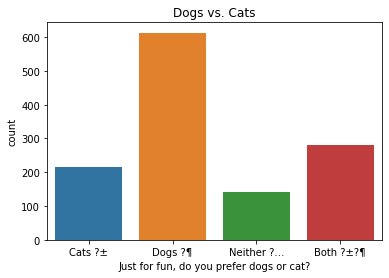

In [11]:
sns.countplot(data['Just for fun, do you prefer dogs or cat?']).set_title('Dogs vs. Cats');

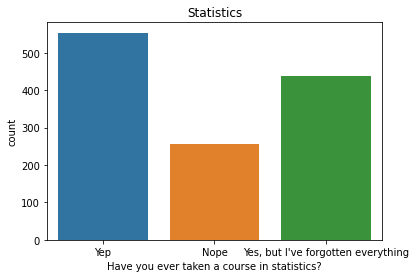

In [12]:
sns.countplot(data['Have you ever taken a course in statistics?']).set_title('Statistics');

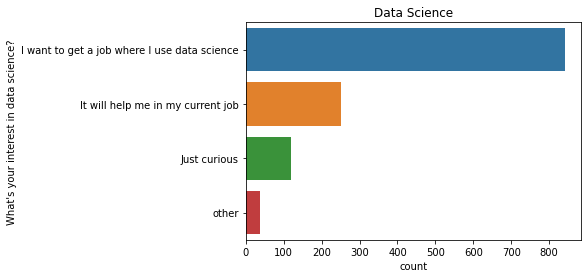

In [13]:
sns.countplot(y=data['What\'s your interest in data science?']).set_title('Data Science');

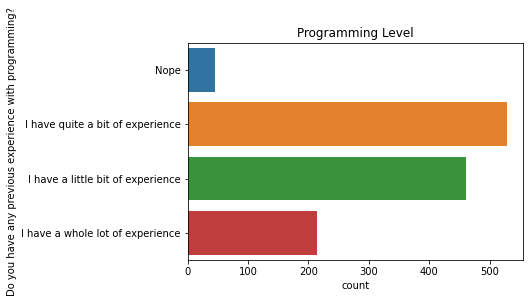

In [14]:
sns.countplot(y=data['Do you have any previous experience with programming?']).set_title('Programming Level');

In [15]:
data.describe().T

,count,unique,top,freq
Have you ever taken a course in statistics?,1249,3,Yep,554
Do you have any previous experience with programming?,1249,4,I have quite a bit of experience,528
What's your interest in data science?,1249,4,I want to get a job where I use data science,841
"Just for fun, do you prefer dogs or cat?",1249,4,Dogs ?¶,613


In [16]:
import scipy.stats as st

In [17]:
st.chisquare(data['Have you ever taken a course in statistics?'].value_counts())

Power_divergenceResult(statistic=108.50120096076861, pvalue=2.7495623442639547e-24)

In [18]:
st.chisquare(data['Do you have any previous experience with programming?'].value_counts())

Power_divergenceResult(statistic=477.8759007205765, pvalue=2.972146646358778e-103)

In [19]:
contingencyTable = pd.crosstab(data['Do you have any previous experience with programming?'], data['Have you ever taken a course in statistics?'])
contingencyTable

Have you ever taken a course in statistics?,Nope,Yep,"Yes, but I've forgotten everything"
Do you have any previous experience with programming?,,,
I have a little bit of experience,91,190,180
I have a whole lot of experience,40,110,64
I have quite a bit of experience,108,237,183
Nope,17,17,12


In [20]:
st.chi2_contingency(contingencyTable)

(15.347502268424691,
 0.017719469031429267,
 6,
 array([[ 94.48839071, 204.47878303, 162.03282626],
        [ 43.86228983,  94.92073659,  75.21697358],
        [108.22097678, 234.19695757, 185.58206565],
        [  9.42834267,  20.40352282,  16.16813451]]))

In [21]:
import numpy as np

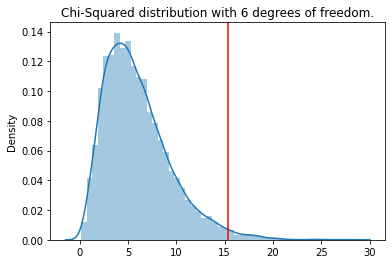

In [28]:
dof = 6
chi2 = 15.347502268424691
sns.distplot(np.random.chisquare(dof,size=10000));
plt.axvline(chi2,color='r');
plt.title('Chi-Squared distribution with %d degrees of freedom.' % dof);

In [23]:
# Alpha level chosen is: alpha/3 = 0.05/3 = 0.016 
# this has to do with the fact that we
# can get significant effect just due to
# chance that increases with each performed
# test. So we have to divide by number of tests.